# Data Loading

In the first step, we load the required data for our analysis. We read the electric vehicle population data and the census median income data from their respective CSV files.

In [26]:
import pandas as pd
import numpy as np
import re
from IPython.display import Image

In [46]:
electric_vehicle_population = pd.read_csv("./QGIS_data/EV-data.csv")
census_median_income = pd.read_csv("./QGIS_data/census-data.csv")

# Clean Vehicle Data

To simplify the column names for easier use in python, we will rename the columns to lowercase and replace spaces with underscores. We will also remove the four rows where the "model" column contains NA values. Additionally, we will create a new column, "vehicle," by combining the "year," "make," and "model" fields.

In [13]:
electric_vehicle_population.columns = electric_vehicle_population.columns.str.lower().str.replace(' ', '_')

electric_vehicle_population_clean = electric_vehicle_population.dropna(subset=['model'])

electric_vehicle_population_clean['vehicle'] = electric_vehicle_population_clean['model_year'].astype(str) + ' ' + electric_vehicle_population_clean['make'] + ' ' + electric_vehicle_population_clean['model']
electric_vehicle_population_clean['postal_code'] = electric_vehicle_population_clean['postal_code'].fillna(0).astype(int).astype(str)
electric_vehicle_population_clean.head()

vin_(1-10)    county       city state postal_code  model_year        make  \
0  1N4AZ0CP8D      King  Shoreline    WA       98177        2013      NISSAN   
1  5YJSA1E45K      King    Seattle    WA       98112        2019       TESLA   
2  WVGUNPE28M    Kitsap     Olalla    WA       98359        2021  VOLKSWAGEN   
3  JTDKARFP6H  Thurston    Olympia    WA       98501        2017      TOYOTA   
4  1FADP5CU9G  Thurston    Olympia    WA       98506        2016        FORD   

         model                   electric_vehicle_type  \
0         LEAF          Battery Electric Vehicle (BEV)   
1      MODEL S          Battery Electric Vehicle (BEV)   
2         ID.4          Battery Electric Vehicle (BEV)   
3  PRIUS PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
4        C-MAX  Plug-in Hybrid Electric Vehicle (PHEV)   

   clean_alternative_fuel_vehicle_(cafv)_eligibility  electric_range  \
0            Clean Alternative Fuel Vehicle Eligible            75.0   
1            Clean Alternative Fuel Vehicle Eligible           270.0   
2  Eligibility unknown as battery range has not b...             0.0   
3              Not eligible due to low battery range            25.0   
4              Not eligible due to low battery range            19.0   

   base_msrp  legislative_district  dol_vehicle_id  \
0        0.0                  32.0       125450447   
1        0.0                  43.0       101662900   
2        0.0                  26.0       272118717   
3        0.0                  22.0       349372929   
4        0.0                  22.0       171625653   

              vehicle_location                              electric_utility  \
0  POINT (-122.36498 47.72238)  CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)   
1  POINT (-122.30207 47.64085)  CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)   
2  POINT (-122.54729 47.42602)                        PUGET SOUND ENERGY INC   
3  POINT (-122.89166 47.03956)                        PUGET SOUND ENERGY INC   
4  POINT (-122.87741 47.05997)                        PUGET SOUND ENERGY INC   

   2020_census_tract                  vehicle  
0       5.303302e+10         2013 NISSAN LEAF  
1       5.303301e+10       2019 TESLA MODEL S  
2       5.303509e+10     2021 VOLKSWAGEN ID.4  
3       5.306701e+10  2017 TOYOTA PRIUS PRIME  
4       5.306701e+10          2016 FORD C-MAX

# Clean Income Data
We are interested in the column `S1903_C03_001E`. To focus on zip codes and income data, we’ll clean the table by extracting zip codes, which are strings starting with “ZCTA5,” and removing the prefix to isolate the zip codes. This will leave us with a simplified table containing two columns: `zip_code` and `median_household_income`. Rows with missing income data are marked with “-”, so we’ll filter those out.

In [15]:
census_median_income.head()

GEO_ID                  NAME  \
0       Geography  Geographic Area Name   
1  8600000US98001           ZCTA5 98001   
2  8600000US98002           ZCTA5 98002   
3  8600000US98003           ZCTA5 98003   
4  8600000US98004           ZCTA5 98004   

                                      S1903_C01_001E  \
0  Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...   
1                                              11648   
2                                              13162   
3                                              18515   
4                                              17460   

                                      S1903_C01_001M  \
0  Margin of Error!!Number!!HOUSEHOLD INCOME BY R...   
1                                                558   
2                                                583   
3                                                823   
4                                                660   

                                      S1903_C01_002E  \
0  Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...   
1                                               7681   
2                                               8812   
3                                              10454   
4                                              10494   

                                      S1903_C01_002M  \
0  Margin of Error!!Number!!HOUSEHOLD INCOME BY R...   
1                                                506   
2                                                611   
3                                                663   
4                                                616   

                                      S1903_C01_003E  \
0  Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...   
1                                                716   
2                                               1071   
3                                               2887   
4                                                372   

                                      S1903_C01_003M  \
0  Margin of Error!!Number!!HOUSEHOLD INCOME BY R...   
1                                                198   
2                                                289   
3                                                553   
4                                                187   

                                      S1903_C01_004E  \
0  Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...   
1                                                183   
2                                                299   
3                                                114   
4                                                 26   

                                      S1903_C01_004M  ...  \
0  Margin of Error!!Number!!HOUSEHOLD INCOME BY R...  ...   
1                                                100  ...   
2                                                140  ...   
3                                                 68  ...   
4                                                 39  ...   

                                      S1903_C03_036M  \
0  Margin of Error!!Median income (dollars)!!NONF...   
1                                               7519   
2                                               4679   
3                                               6290   
4                                              11161   

                                      S1903_C03_037E  \
0  Estimate!!Median income (dollars)!!NONFAMILY H...   
1                                             135112   
2                                              70682   
3                                              81797   
4                                             131719   

                                      S1903_C03_037M  \
0  Margin of Error!!Median income (dollars)!!NONF...   
1                                              33727   
2                                              15215   
3                                              15871   
4                                              34582   

               

In [17]:
census_median_income_clean = census_median_income.iloc[1:].copy()
census_median_income_clean = census_median_income_clean[['NAME', 'S1903_C03_001E']]
census_median_income_clean = census_median_income_clean.rename(columns={'S1903_C03_001E': 'median_household_income'})
census_median_income_clean = census_median_income_clean.dropna(subset=['median_household_income'])

# Extract zip codes and clean data
census_median_income_clean['zip_code'] = census_median_income_clean['NAME'].str.split(' ').str[-1]
census_median_income_clean = census_median_income_clean[['zip_code', 'median_household_income']]

# Filter out rows with missing income data
census_median_income_clean = census_median_income_clean[census_median_income_clean['median_household_income'] != '-']

census_median_income_clean.head()

zip_code median_household_income
1    98001                   88962
2    98002                   59097
3    98003                   59560
4    98004                  142173
5    98005                  135225

## Data for QGIS-project
*   create excel with income data to use in the QGIS-project
*   create maps

In [ ]:
# Get the notebook's directory and create the file path
notebook_path = os.path.abspath('')
csv_file_path = os.path.join(notebook_path, 'CSV_census_median_income_clean.csv')

# Save to CSV with error handling
try:
    census_median_income_clean.to_csv(csv_file_path, index=False)
    print(f"Data successfully saved to {csv_file_path}")
except Exception as e:
    print(f"Error saving data: {e}")

Data successfully saved to /content/CSV_census_median_income_clean.csv


In [ ]:
MEDIAN_income_CSV = '/content/drive/MyDrive/Universität Wien/Master Digital Humanities/WS24_25/Doing Data Science/Project/code/CSV_census_median_income_clean.csv'
MEDIAN_income_CSV = pd.read_csv(MEDIAN_income_CSV)
MEDIAN_income_CSV.head()

zip_code  median_household_income
0     98001                    88962
1     98002                    59097
2     98003                    59560
3     98004                   142173
4     98005                   135225

#### VALUE COUNTS per zipcode in Washington State
* saved as csv

In [19]:
#create value counts of cars per zipcode in WA, USA
value_counts = electric_vehicle_population_clean['postal_code'].value_counts()
value_counts.head(100)

98052    5405
98012    4087
98033    3590
98006    3419
98004    3257
         ... 
98030     747
98178     747
98070     741
99301     740
98503     732
Name: postal_code, Length: 100, dtype: int64

In [ ]:
#ONLY WASHINGTON STATE vehicles ('WA' in column 'state')

# Filter the DataFrame to include only rows where the 'state' column is 'WA'
wa_electric_vehicles = electric_vehicle_population_clean[electric_vehicle_population_clean['state'] == 'WA']

# Now calculate the value counts for postal codes in Washington
value_counts_wa = wa_electric_vehicles['postal_code'].value_counts()

# Display the top values (e.g., top 100)
value_counts_wa.head()


# Save the filtered data (wa_electric_vehicles) to a CSV file
wa_electric_vehicles.to_csv('wa_electric_vehicles.csv', index=False)

In [ ]:
#VALUE COUNTS per zipcode in Washington

# Filter the DataFrame to include only rows where the 'state' column is 'WA'
wa_electric_vehicles = electric_vehicle_population_clean[electric_vehicle_population_clean['state'] == 'WA']

# Now calculate the value counts for postal codes in Washington
value_counts_wa = wa_electric_vehicles['postal_code'].value_counts()

# Create a DataFrame from value_counts_wa
value_counts_df = value_counts_wa.reset_index()
value_counts_df.columns = ['zip_code', 'vehicle_count']

# Save the value counts DataFrame to a CSV file
value_counts_df.to_csv('wa_vehicle_counts_per_zipcode.csv', index=False)

In [ ]:
num_rows = len(value_counts_wa)
print(f"Number of rows in the filtered data: {num_rows}")

Number of rows in the filtered data: 566


### Creating QGIS-data
* combine csv of median income with csv of vehicle count
* merge CSVs and if zip code is not available in the file of vehicle count file not available,
* but in the other file present add new record with that zipcode

In [ ]:

ZIPCODE_file_path = '/content/drive/MyDrive/Universität Wien/Master Digital Humanities/WS24_25/Doing Data Science/Project/code/wa_vehicle_counts_per_zipcode.csv'
MEDIAN_income_CSV = '/content/drive/MyDrive/Universität Wien/Master Digital Humanities/WS24_25/Doing Data Science/Project/code/CSV_census_median_income_clean.csv'


# Load the DataFrames
vehicle_counts_df = pd.read_csv(ZIPCODE_file_path)
median_income_df = pd.read_csv(MEDIAN_income_CSV)

# Convert 'zip_code' columns to strings for consistency
vehicle_counts_df['zip_code'] = vehicle_counts_df['zip_code'].astype(str)
median_income_df['zip_code'] = median_income_df['zip_code'].astype(str)

# Merge DataFrames using an outer join
combined_df = pd.merge(median_income_df, vehicle_counts_df, on='zip_code', how='outer')

# Fill NaN values with 0
combined_df = combined_df.fillna(0)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('combined_data_NEW.csv', index=False)

print("Combined data saved.")

Combined data saved.


#### Population data

* add population data to 'combined_data_NEW.csv'


INFO: ROW 2 and 3 were deleted for better usability!



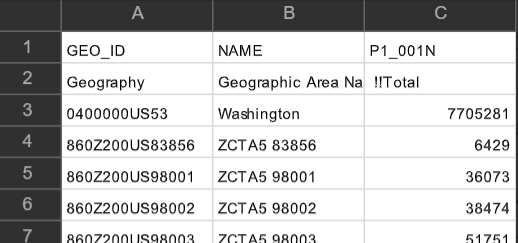

In [23]:
image_path = 'Screenshot 2025-01-16 195434.png'
print("\nINFO: ROW 2 and 3 were deleted for better usability!\n")
display(Image(image_path))

In [ ]:
population_data = '/content/drive/MyDrive/Universität Wien/Master Digital Humanities/WS24_25/Doing Data Science/Project/code/POPULATION_2020_data_edited.csv'

population_data_CSV = pd.read_csv(population_data)
population_data_CSV.head()

GEO_ID         NAME  P1_001N
0  860Z200US83856  ZCTA5 83856     6429
1  860Z200US98001  ZCTA5 98001    36073
2  860Z200US98002  ZCTA5 98002    38474
3  860Z200US98003  ZCTA5 98003    51751
4  860Z200US98004  ZCTA5 98004    39136

In [ ]:
# drop column(0
# rename column "NAME" to "zip_code"
# clean entries of column "zip_code" --> remove "ZCTA5" with regular expressions

data = population_data_CSV

# Delete the first column
data = data.iloc[:, 1:]

# Rename the column 'NAME' to 'zip_code'
data.rename(columns={'NAME': 'zip_code'}, inplace=True)

# Normalize the zip_code column using regular expressions
data['zip_code'] = data['zip_code'].apply(lambda x: re.search(r'\d{5}', x).group() if re.search(r'\d{5}', x) else x)
# Save the modified CSV
data.to_csv('QGIS_data.csv', index=False)

In [ ]:
# calculate vehicle per person and create new column

combined_data_QGIS = '/content/drive/MyDrive/Universität Wien/Master Digital Humanities/WS24_25/Doing Data Science/Project/code/combined_data_NEW.csv'
combined_data_QGIS_1 = pd.read_csv(combined_data_QGIS)
combined_data_QGIS_1.head()

zip_code  median_household_income  vehicle_count
0     98001                  88962.0          930.0
1     98002                  59097.0          355.0
2     98003                  59560.0          722.0
3     98004                 142173.0         3257.0
4     98005                 135225.0         1597.0

In [ ]:
population_CLEANED_data = '/content/drive/MyDrive/Universität Wien/Master Digital Humanities/WS24_25/Doing Data Science/Project/code/WA_population_data_CLEANED.csv'
population_CLEANED = pd.read_csv(population_CLEANED_data)
population_CLEANED.head()

zip_code  P1_001N
0     83856     6429
1     98001    36073
2     98002    38474
3     98003    51751
4     98004    39136

In [ ]:
# add 'P1_001N'-data to corresponding zipcode of combined_data_QGIS_1['zip_code']

In [ ]:
# Assuming you have already loaded the DataFrames:
# combined_data_QGIS_1
# population_CLEANED

# Rename the 'zip_code' column in population_CLEANED to match combined_data_QGIS_1
population_CLEANED.rename(columns={'zip_code': 'zip_code_pop'}, inplace=True)

# Merge the two DataFrames based on 'zip_code' and 'zip_code_pop'
combined_data_QGIS_1 = pd.merge(combined_data_QGIS_1, population_CLEANED[['zip_code_pop', 'P1_001N']], left_on='zip_code', right_on='zip_code_pop', how='left')

# Drop the temporary 'zip_code_pop' column
combined_data_QGIS_1.drop(columns=['zip_code_pop'], inplace=True)

# Now, combined_data_QGIS_1 will have a new column 'P1_001N' with the population data
# for the matching zip codes.
combined_data_QGIS_1.to_csv('zip_income_vehicle_WApopulation.csv', index=False)

combined_data_QGIS_1.head()

zip_code  median_household_income  vehicle_count  P1_001N
0     98001                  88962.0          930.0  36073.0
1     98002                  59097.0          355.0  38474.0
2     98003                  59560.0          722.0  51751.0
3     98004                 142173.0         3257.0  39136.0
4     98005                 135225.0         1597.0  20961.0

In [ ]:
# create new column with "vehicle per population"-count (vehicle_count / P1_001N)

combined_data_QGIS_1['vehicle_per_person'] = combined_data_QGIS_1['vehicle_count'] / combined_data_QGIS_1['P1_001N']
combined_data_QGIS_1.to_csv('qgis_data_FINAL_version.csv', index=False)
combined_data_QGIS_1.head()

zip_code  median_household_income  vehicle_count  P1_001N  \
0     98001                  88962.0          930.0  36073.0   
1     98002                  59097.0          355.0  38474.0   
2     98003                  59560.0          722.0  51751.0   
3     98004                 142173.0         3257.0  39136.0   
4     98005                 135225.0         1597.0  20961.0   

   vehicle_per_person  
0            0.025781  
1            0.009227  
2            0.013951  
3            0.083223  
4            0.076189

In [ ]:
# Fill NULL values with 0 in both columns before division
combined_data_QGIS_1['vehicle_count'] = combined_data_QGIS_1['vehicle_count'].fillna(0)
combined_data_QGIS_1['P1_001N'] = combined_data_QGIS_1['P1_001N'].fillna(0)

# Create new column with "vehicle per population"-count
combined_data_QGIS_1['vehicle_per_person'] = combined_data_QGIS_1['vehicle_count'] / combined_data_QGIS_1['P1_001N']

# Replace any resulting NaN from division by zero with 0
combined_data_QGIS_1['vehicle_per_person'] = combined_data_QGIS_1['vehicle_per_person'].fillna(0)

combined_data_QGIS_1.to_csv('qgis_data_FINAL_version.csv', index=False)
combined_data_QGIS_1.head()


zip_code  median_household_income  vehicle_count  P1_001N  \
0     98001                  88962.0          930.0  36073.0   
1     98002                  59097.0          355.0  38474.0   
2     98003                  59560.0          722.0  51751.0   
3     98004                 142173.0         3257.0  39136.0   
4     98005                 135225.0         1597.0  20961.0   

   vehicle_per_person  
0            0.025781  
1            0.009227  
2            0.013951  
3            0.083223  
4            0.076189

In [ ]:
# Fill NULL values with 0 and ensure float type
combined_data_QGIS_1['vehicle_count'] = combined_data_QGIS_1['vehicle_count'].fillna(0).astype(float)
combined_data_QGIS_1['P1_001N'] = combined_data_QGIS_1['P1_001N'].fillna(0).astype(float)

# Create new column with "vehicle per population"-count
# Using numpy where to handle division by zero
import numpy as np
combined_data_QGIS_1['vehicle_per_person'] = np.where(
    combined_data_QGIS_1['P1_001N'] == 0,
    0,
    combined_data_QGIS_1['vehicle_count'] / combined_data_QGIS_1['P1_001N']
)

# Print the specific row to check the calculation
print(combined_data_QGIS_1[combined_data_QGIS_1['vehicle_count'] == 26.0])

combined_data_QGIS_1.to_csv('qgis_data_FINAL_version.csv', index=False)
combined_data_QGIS_1.head()



     zip_code  median_household_income  vehicle_count  P1_001N  \
165     98315                  66736.0           26.0   5482.0   
190     98351                  51109.0           26.0   1330.0   
198     98361                  41763.0           26.0   1000.0   
404     98844                  43306.0           26.0   4599.0   
483     99109                  50953.0           26.0   5016.0   

     vehicle_per_person  
165            0.004743  
190            0.019549  
198            0.026000  
404            0.005653  
483            0.005183  


zip_code  median_household_income  vehicle_count  P1_001N  \
0     98001                  88962.0          930.0  36073.0   
1     98002                  59097.0          355.0  38474.0   
2     98003                  59560.0          722.0  51751.0   
3     98004                 142173.0         3257.0  39136.0   
4     98005                 135225.0         1597.0  20961.0   

   vehicle_per_person  
0            0.025781  
1            0.009227  
2            0.013951  
3            0.083223  
4            0.076189

# QGIS: creating maps

Source of *Census geographic files* (Census 2020): https://ofm.wa.gov/washington-data-research/population-demographics/gis-data/census-geographic-files 

## QGIS-maps 

### Map 1: Electric Vehicle Population in Washington, USA - Total Electric Vehicle Count

ADD EXPLANATION

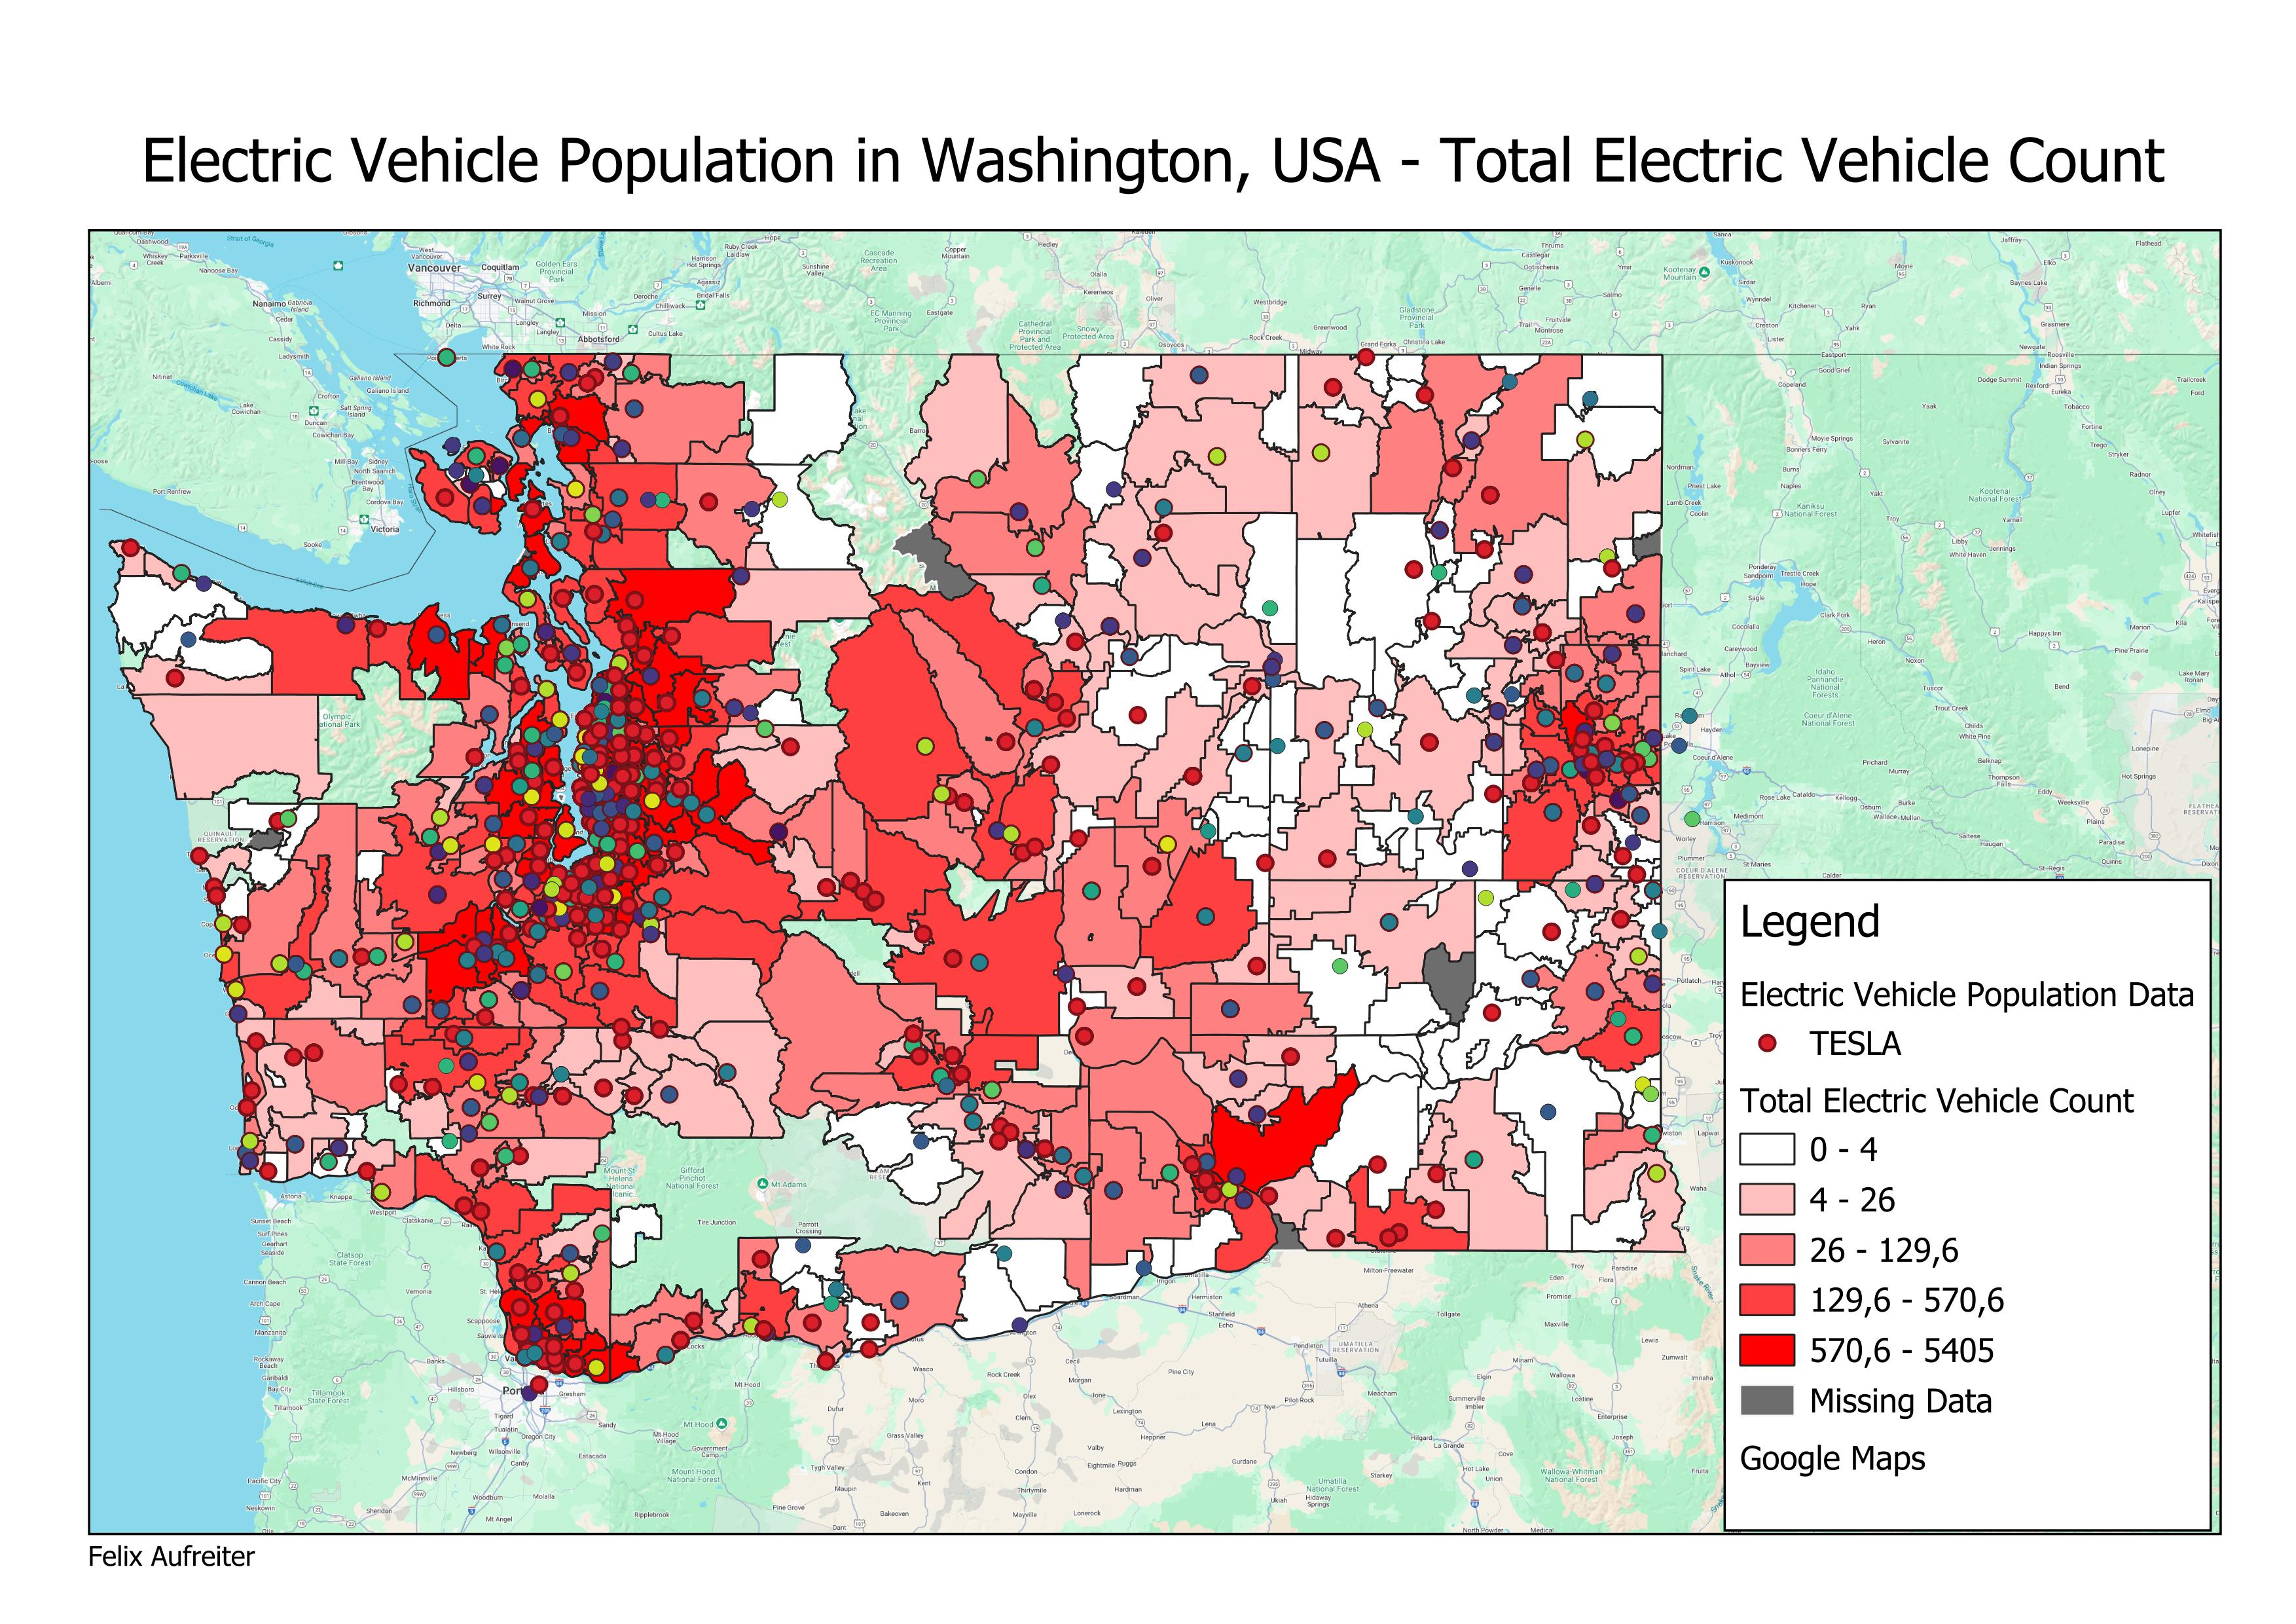

In [40]:
map_total_EV_count = './maps/total_electric_vehicle_count_FINAL.jpg'
display(Image(map_total_EV_count))

### Map 2: Electric Vehicle Population in Washington, USA - Median Household Income

ADD EXPLANATION

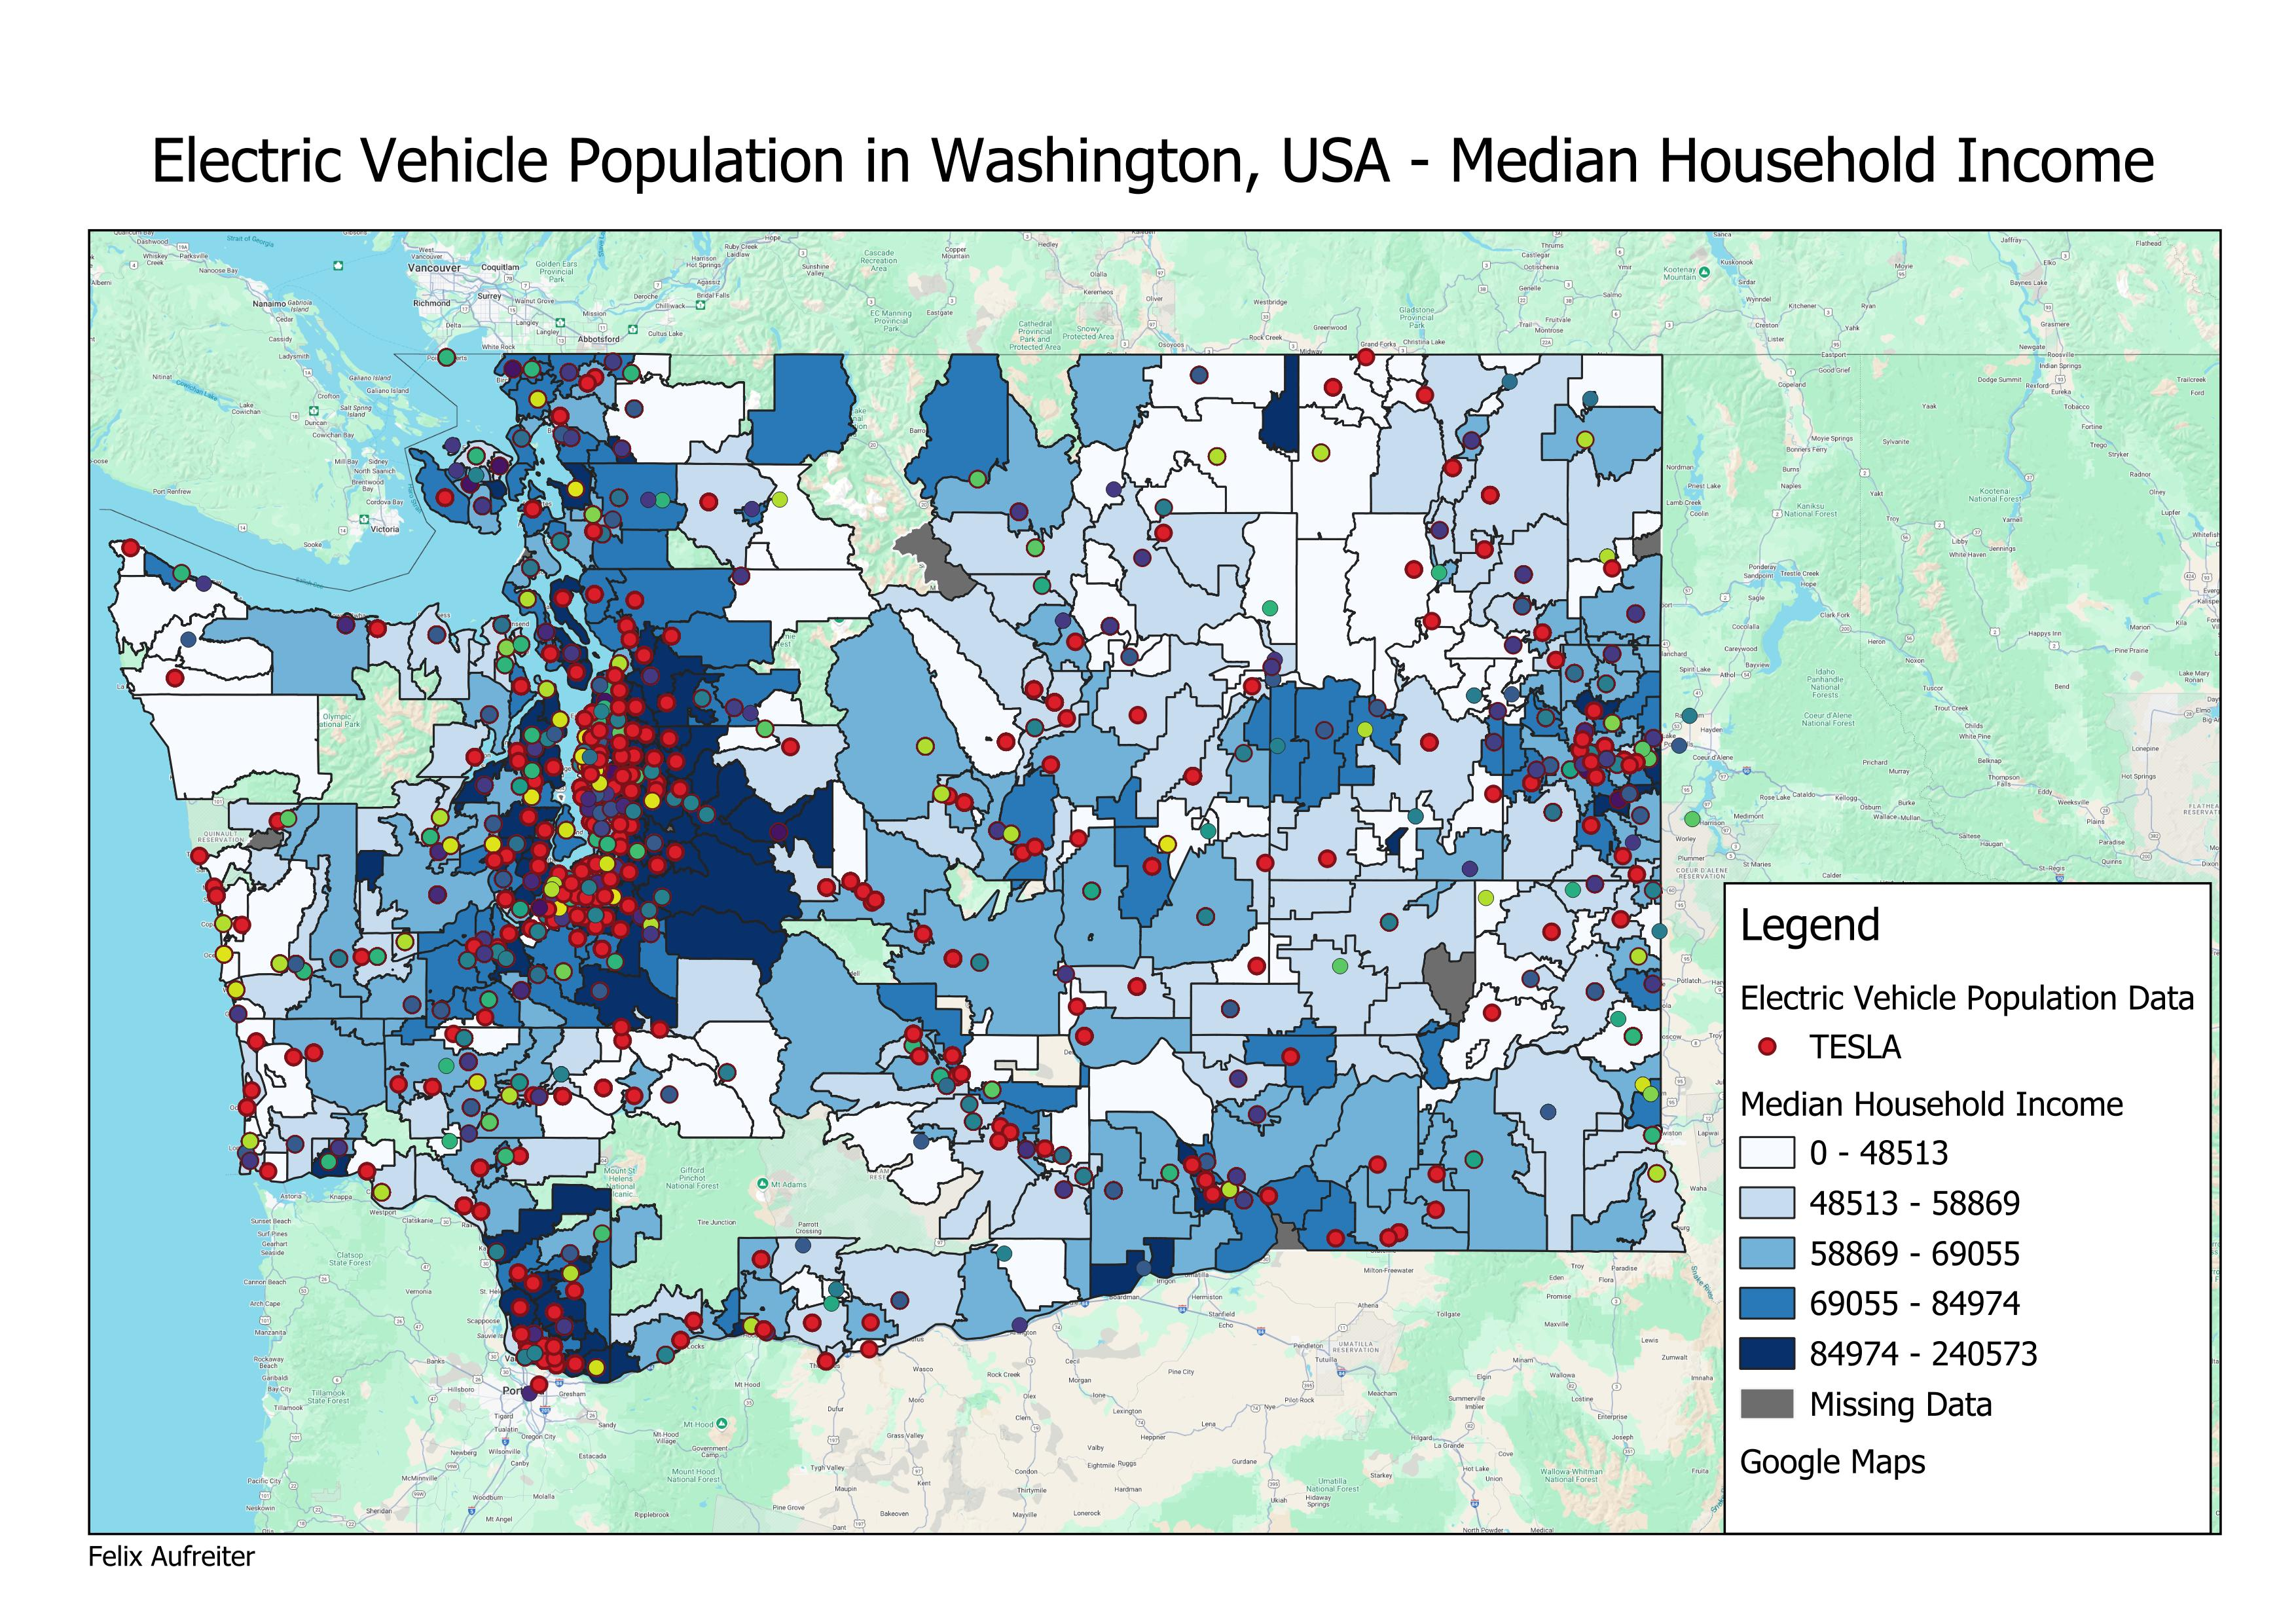

In [36]:
map_median_household_income = './maps/median_household_income_FINAL.jpg'
display(Image(map_median_household_income))

### Map 3: Electric Vehicle Population in Washington, USA - Electric Vehicle per Person

ADD EXPLANATION

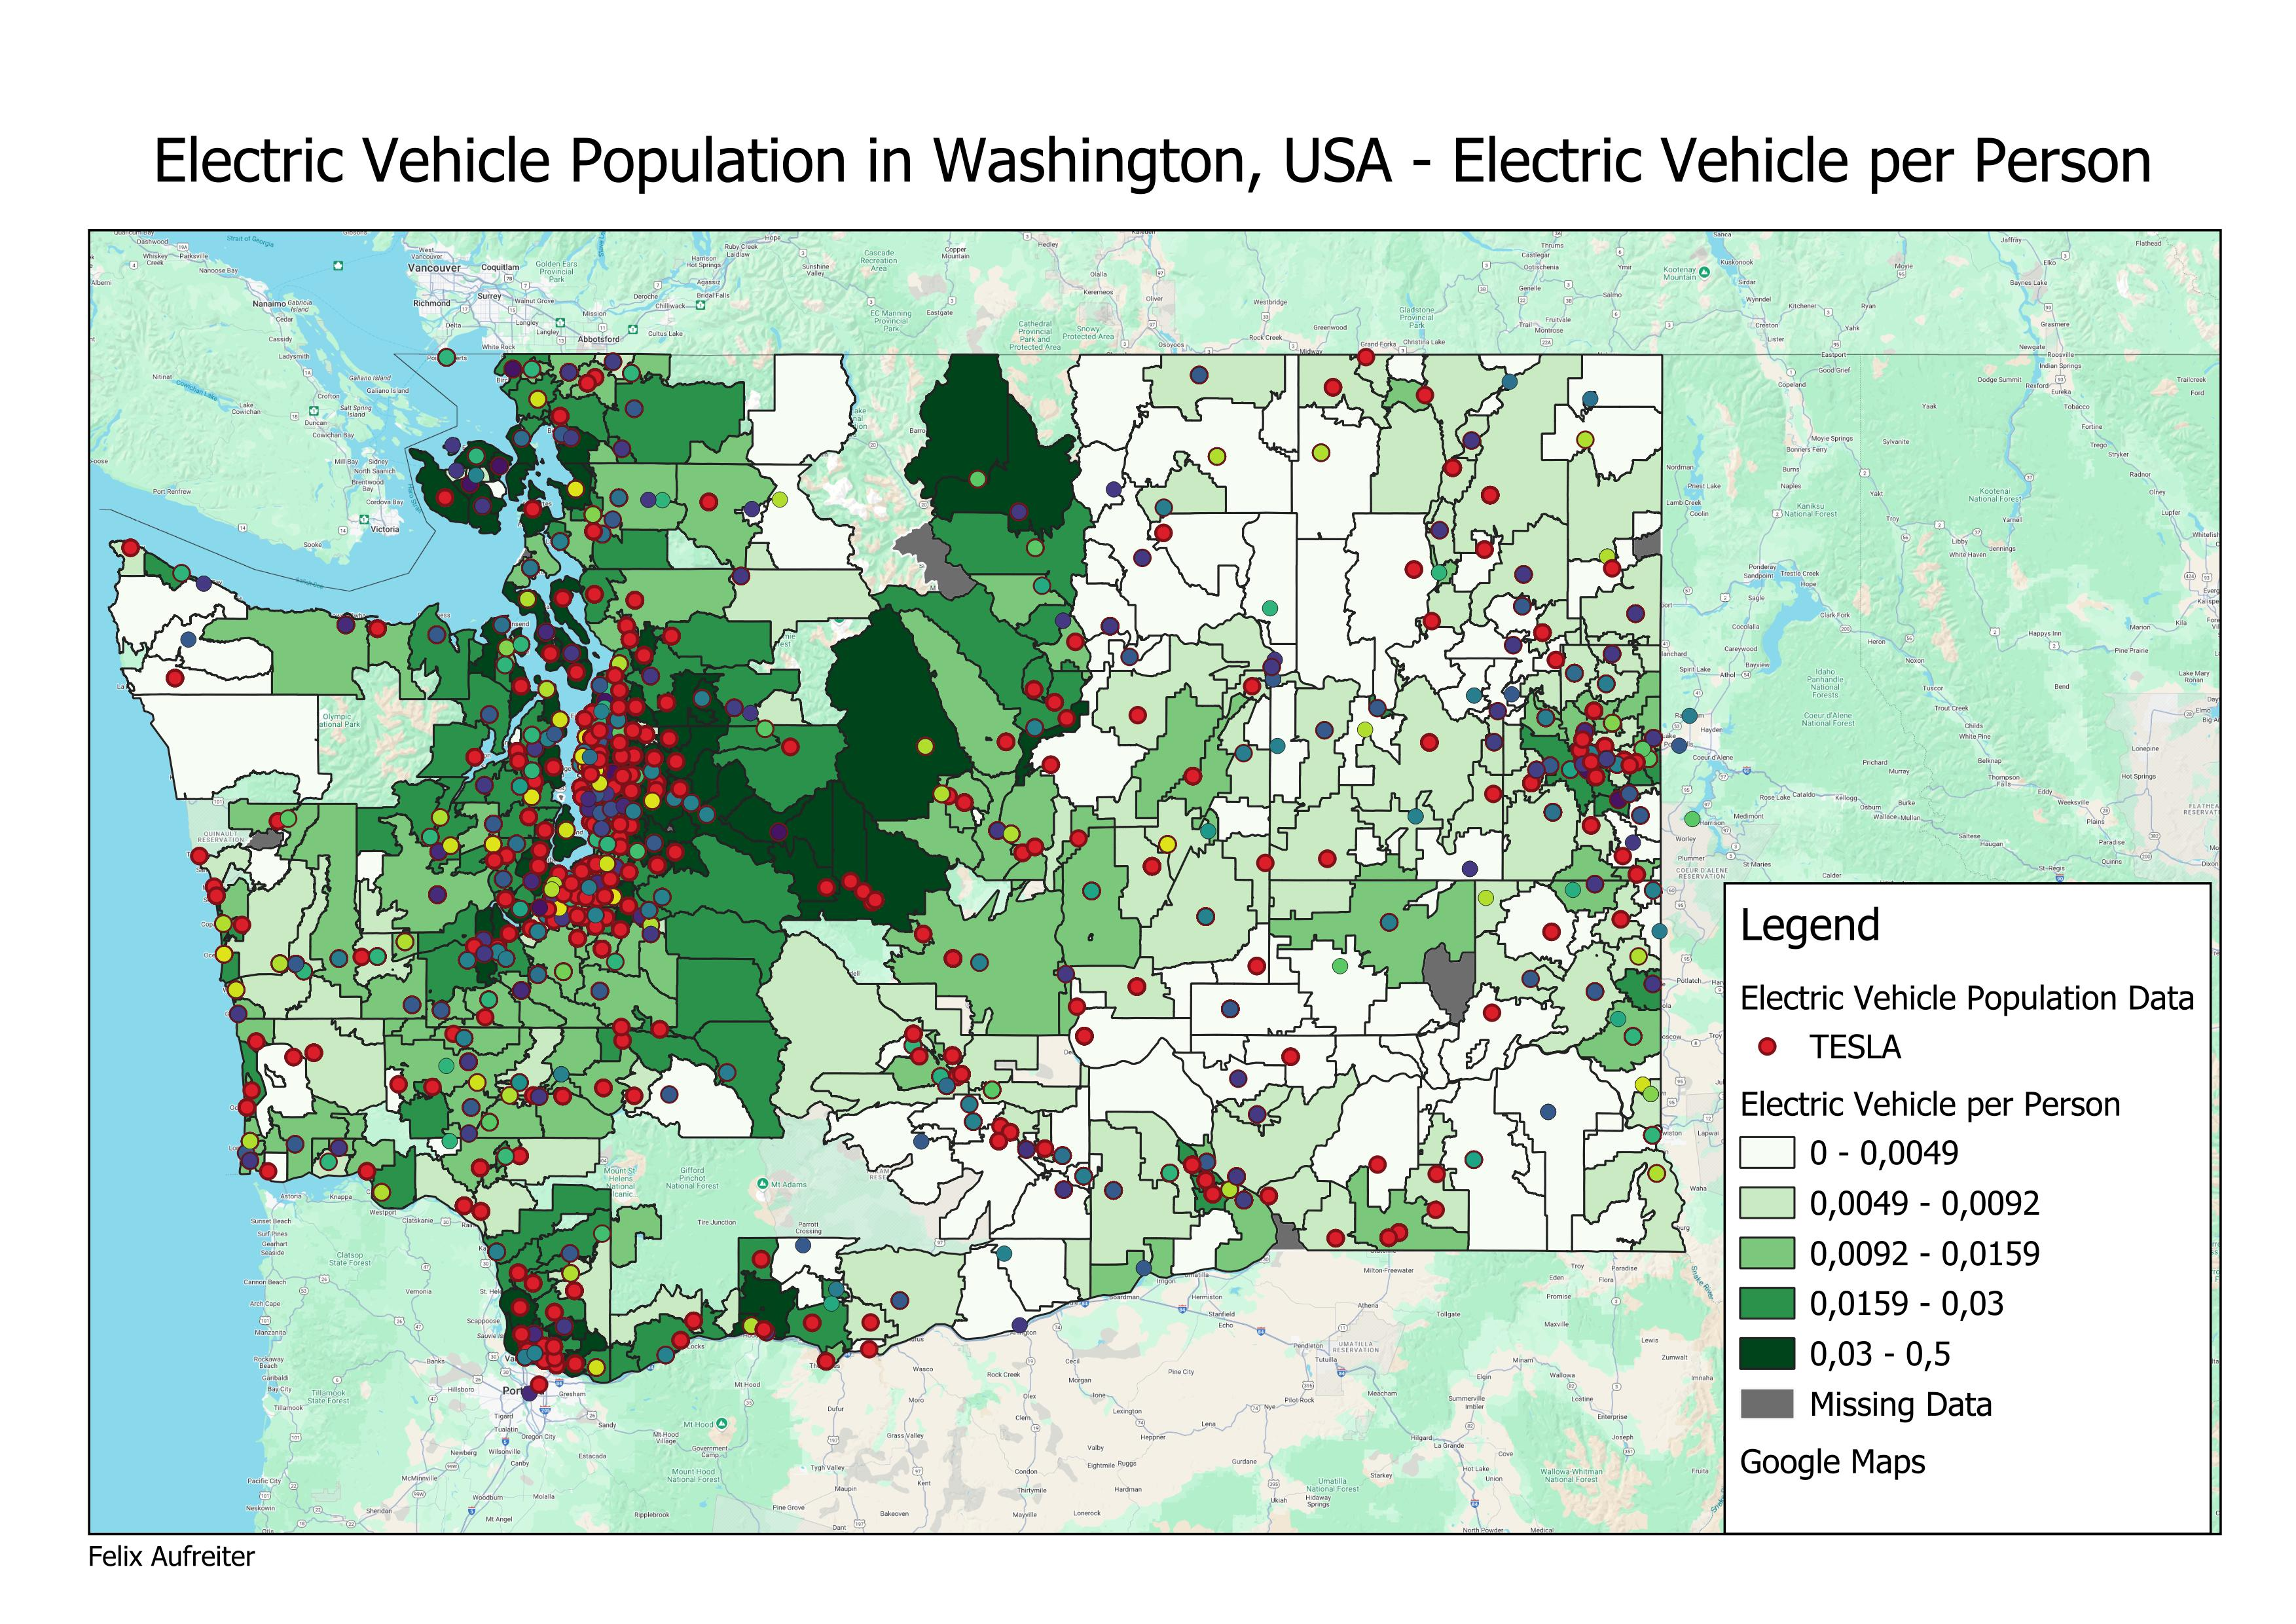

In [34]:
map_EV_per_person = './maps/Electric_vehicle_per_person_FINAL.jpg'
display(Image(map_EV_per_person))

## Interactive QGIS-map
* Have a look at our interactive map: https://faufreiter.github.io/DDS_Group11/ 


INFO: If you would like to check out our interactive map: SCAN THE QR-CODE!



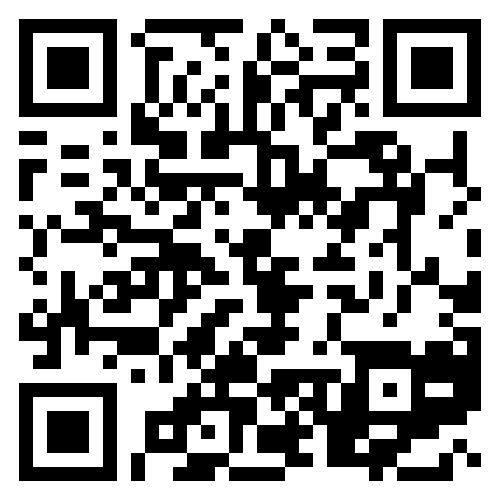

In [55]:
qr_code = './maps/adobe-express-qr-code.png'
print("\nINFO: If you would like to check out our interactive map: SCAN THE QR-CODE!\n")
display(Image(qr_code))